In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Decision Tree Classifier to root out impurities combined with gridsearch to not depend only on one set of data to c what features
#are importatn and what features are not (in other words, shuffling over all data kfolds)
#Then running a param_grid over a knn algorithm to fetch out best hyperparameters based on our best selected features!

In [3]:
Survey = pd.read_csv('ACME-HappinessSurvey2020.csv')
#As long as my notebook path lies within the same location as my Data file pathm I'm OK! Otherwise i need to specify CSV path.

In [4]:
Survey.info()
#7 columns in total, 126 entries for each, no null values, data seems OK!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


<Axes: xlabel='Y', ylabel='count'>

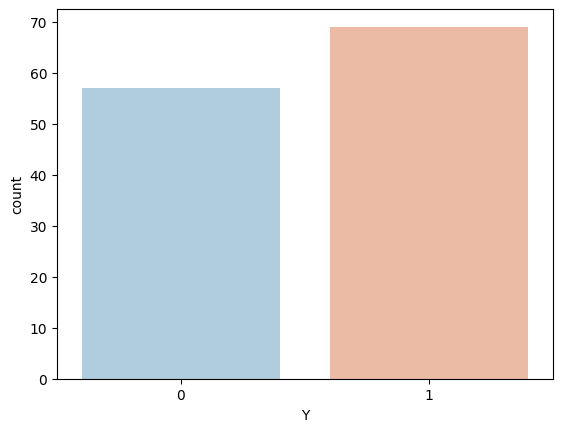

In [5]:
sns.countplot(x= Survey['Y'] , data = Survey , palette = 'RdBu_r')

<Axes: >

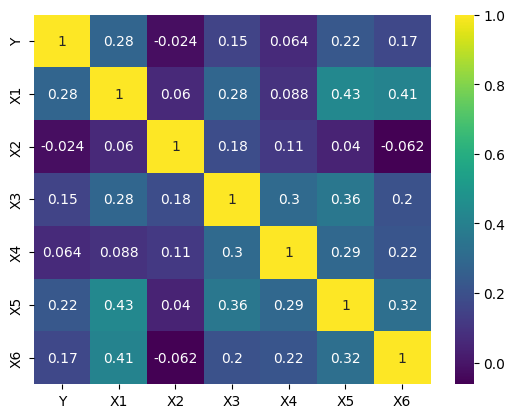

In [6]:
sns.heatmap(Survey.corr() , cmap = 'viridis', annot = True )

<Axes: >

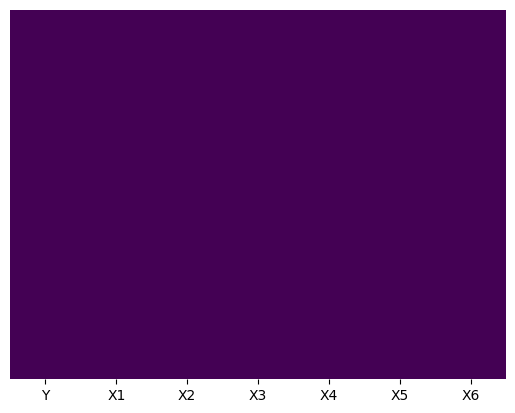

In [7]:
sns.heatmap(Survey.isnull() , yticklabels = False , cbar = False, cmap = 'viridis')
#No nall data

In [8]:
#I understand that this is a "BINARY Clssification" Problem which can be solved using Supervised Learning -> Classification -> Logistics Regression
#Since Data is being classified into two categories (Happy vs Unhappy). How about Multi Classification?
#The target variable(or output), y, can take only discrete values for a given set of features(or inputs), X.

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import array

In [10]:
#Split Lables from Features

In [11]:
#Features
X= Survey.drop(['Y'], axis = 1)

In [12]:
#Lables
y= Survey['Y']

In [13]:
X.head()

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


In [14]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Y, dtype: int64

In [15]:
X.shape

(126, 6)

In [16]:
y.shape

(126,)

In [17]:
y.dtype

dtype('int64')

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [19]:
select = SelectKBest(f_classif, k=4)
X_new = select.fit_transform(X_train, y_train)
filters = select.get_support()
features = X.keys()

In [20]:
X_new.shape

(100, 4)

In [21]:

todf=pd.DataFrame(X_new, columns=features[filter])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
todf.head()

In [403]:
X.keys()

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [23]:
filters = select.get_support()
features = X.keys()


print("All features", features)

print("Selected best 3:")
print(features[filters])
#print(features[filter])
print(X_new[:3]) #first 3 columns just to see what it looks like!

All features Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')
Selected best 3:
Index(['X1', 'X3', 'X5', 'X6'], dtype='object')
[[5 4 4 3]
 [4 3 4 5]
 [5 5 5 5]]


In [24]:
#So why X2 and X4 are not important? Lets Visualize it:

In [25]:
import scipy.stats as stats
from scipy.stats import pearsonr
from warnings import filterwarnings

#this will help ignore warnings
filterwarnings ('ignore')

#jointplot

In [26]:
y_train.shape

(100,)

In [41]:
def plot_join_plot(df, feature, label):
    
    j = sns.jointplot(x= feature, y= label, data =df, kind = 'reg')
    
    (r, p) = pearsonr(feature, label)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)
    
    
    return plt.show()

#Trying to figure out how to annotate p and r values on plot

In [42]:
train_df = pd.concat([X_train, y_train], axis= 1)

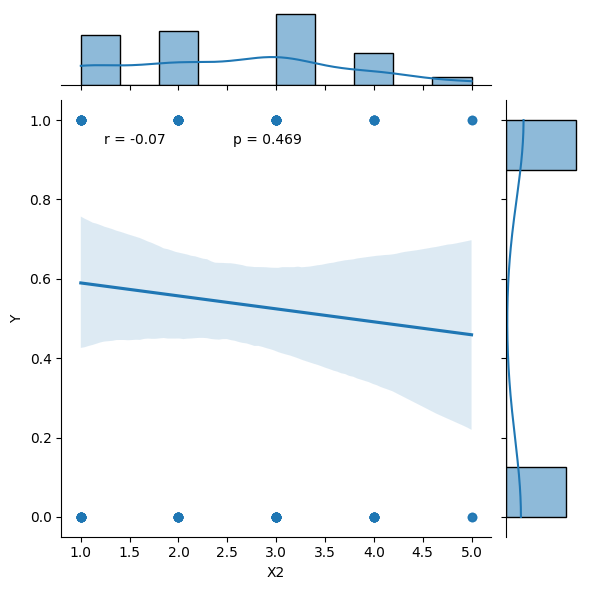

In [43]:
#Run from X1 through X6
plot_join_plot(train_df , X_train["X2"] , y_train)

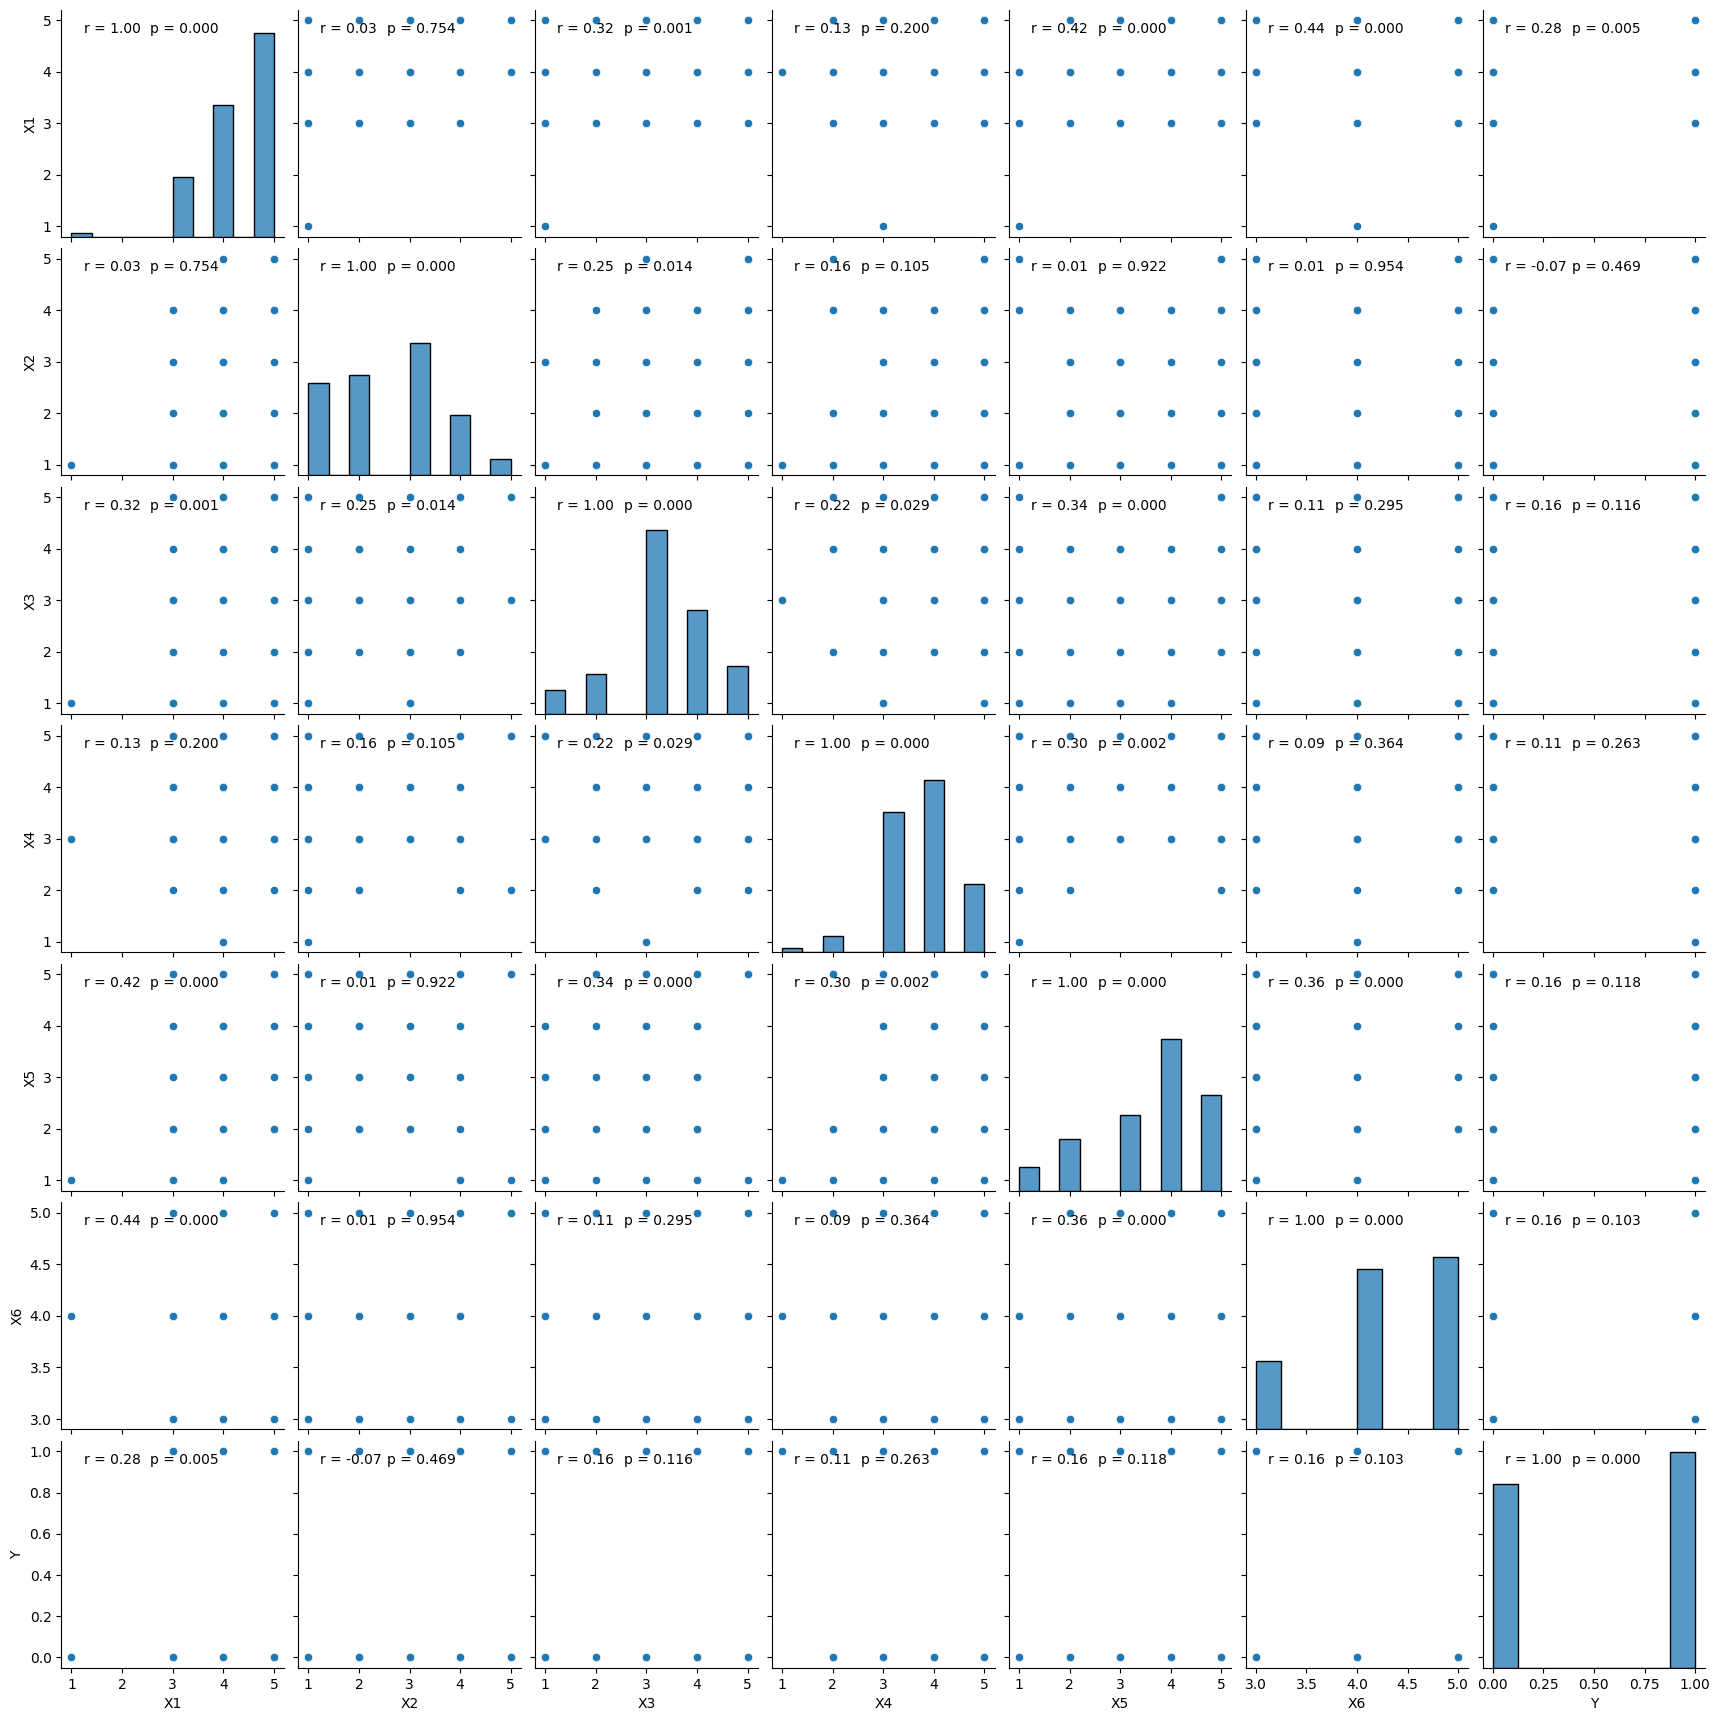

In [468]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)



graph = sns.pairplot(train_df)
graph.map(corrfunc)
plt.show()

In [52]:
train_df.head

<bound method NDFrame.head of      X1  X2  X3  X4  X5  X6  Y
101   5   3   4   3   4   3  1
31    4   1   3   4   4   5  0
69    5   4   5   5   5   5  1
99    3   3   2   4   4   4  0
100   5   2   2   4   5   5  1
..   ..  ..  ..  ..  ..  .. ..
63    5   5   5   2   5   5  0
70    4   3   3   4   3   4  1
81    3   3   3   3   3   4  0
11    4   4   3   4   4   4  0
95    5   5   5   5   5   5  1

[100 rows x 7 columns]>

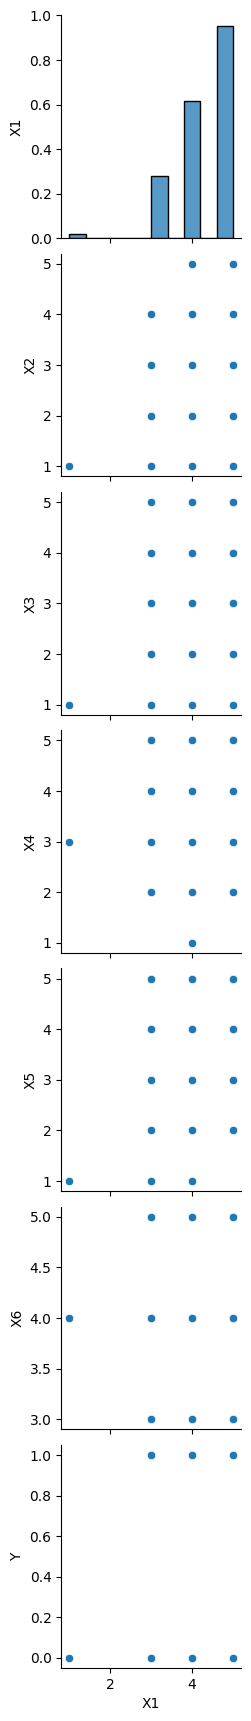

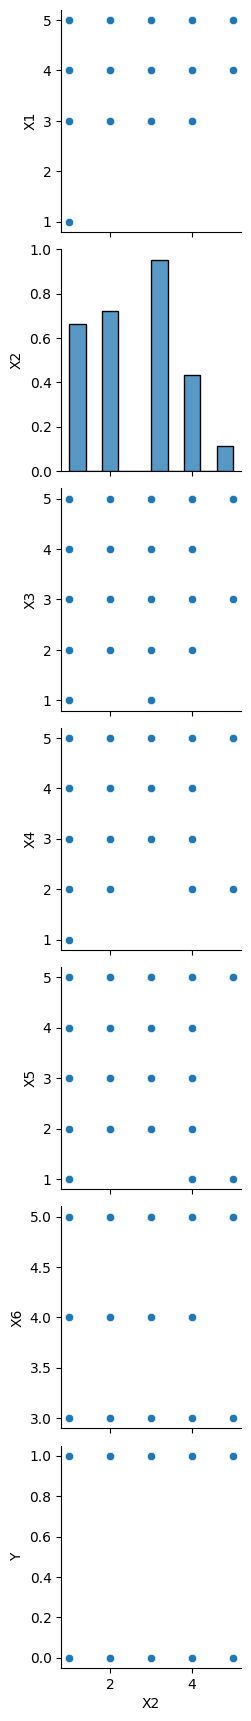

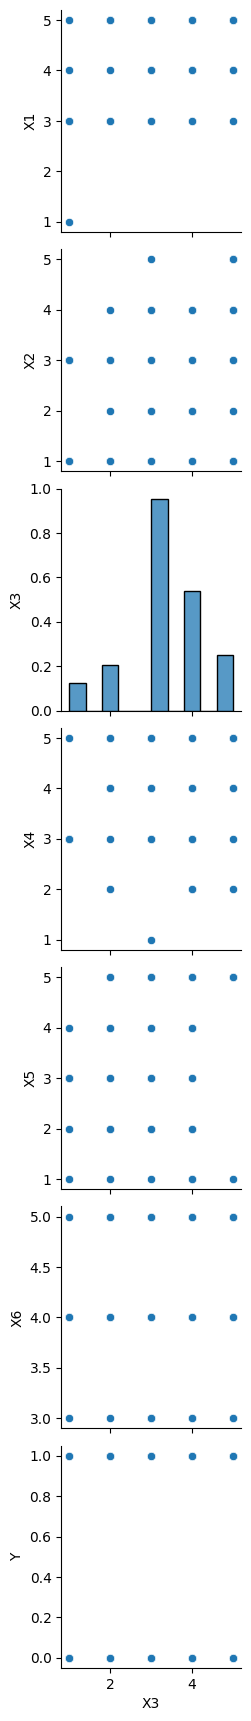

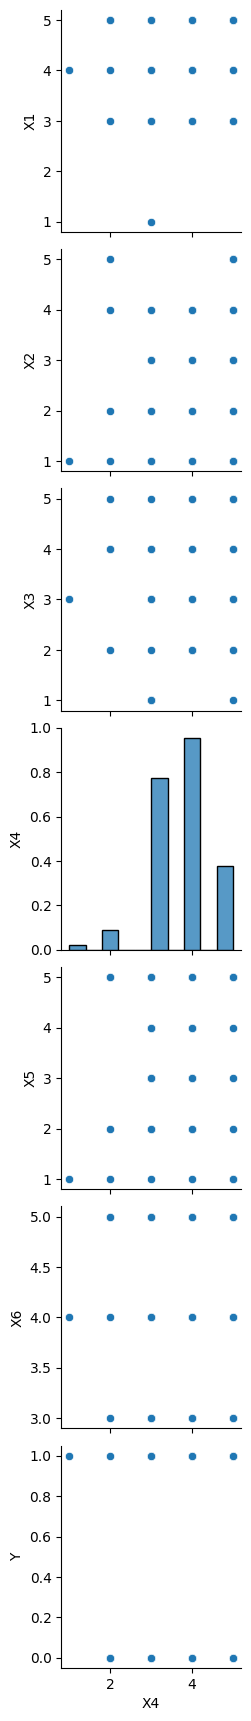

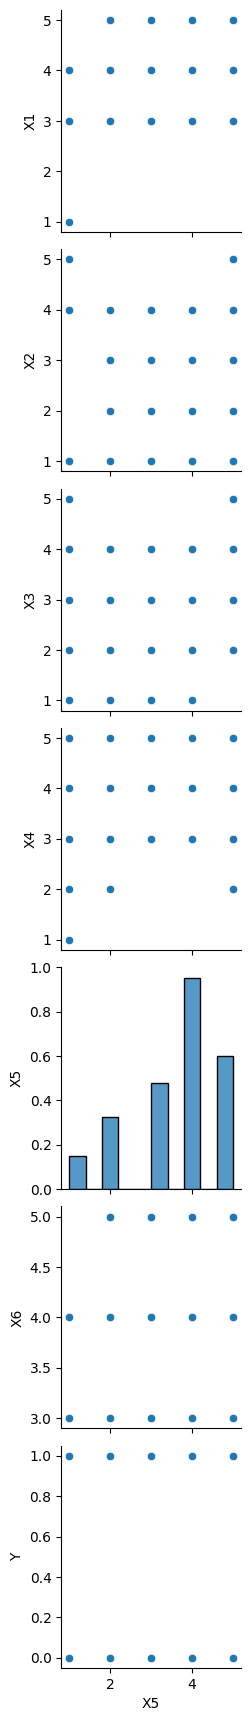

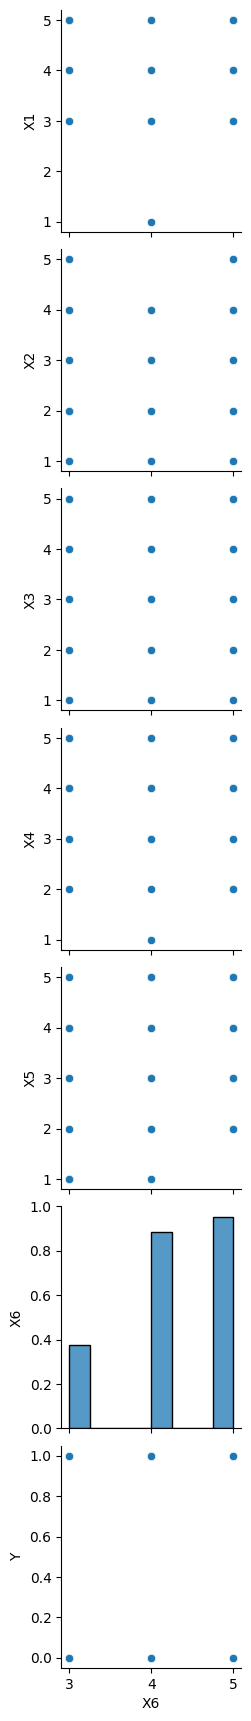

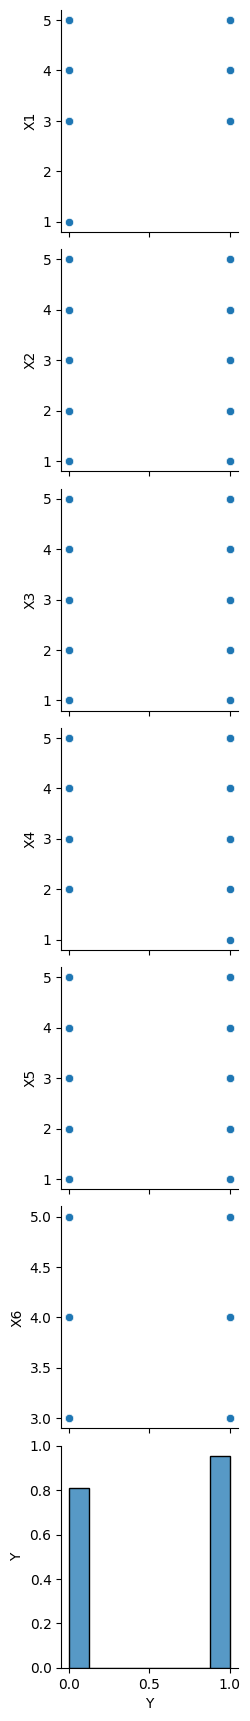

In [53]:
for feature in train_df[0:5]:
    sns_plot = sns.pairplot(data = train_df, x_vars=feature, y_vars=train_df[:6], palette='RdBu')

In [47]:
pearsonr(X_train["X2"], y_train)

PearsonRResult(statistic=-0.07323165668249494, pvalue=0.46901504484883727)

In [480]:
out_list =[]

for column in X_train.columns:
    corr_tuple = pearsonr(X_train[column], y_train)
    out_list.append([column, corr_tuple[0], corr_tuple[1]])

In [489]:
corr_df = pd.DataFrame(out_list, columns = ["Features", "Corr Coef", "P-Value"])

In [490]:
print(corr_df)
#The lower the P-value, the better

  Features  Corr Coef   P-Value
0       X1   0.280158  0.004756
1       X2  -0.073232  0.469015
2       X3   0.157980  0.116458
3       X4   0.112896  0.263418
4       X5   0.157159  0.118392
5       X6   0.163890  0.103244


In [491]:
#Useful links: f_classif function: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html
#-2 https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
#3- https://www.datatechnotes.com/2021/02/seleckbest-feature-selection-example-in-python.html#:~:text=SelectKBest%20Feature%20Selection%20Example%20in%20Python%20Scikit-learn%20API,the%20method%20for%20both%20classification%20and%20regression%20data.
#4- Corr Graphs: https://stackoverflow.com/questions/34255242/seaborn-pairplot-pearsons-p-statistic
#5- Corr table: https://www.youtube.com/watch?v=UW9U0bYJ-Ys